# Diamond Price Prediction`

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
diamond = pd.read_csv('diamonds.csv')
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Content
# price >> price in US dollars ($326--$18,823)

# carat >> weight of the diamond (0.2--5.01)

# cut >> quality of the cut (Fair, Good, Very Good, Premium, Ideal)

# color >> diamond colour, from J (worst) to D (best)

# clarity >> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

# x length in mm (0--10.74)

# y width in mm (0--58.9)

# z depth in mm (0--31.8)

# depth >> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

# table >> width of top of diamond relative to widest point (43--95)

In [7]:
diamond = diamond.drop(diamond.columns[0],1)

In [13]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [16]:
diamond['carat'].isna().sum()

0

In [17]:
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [18]:
len(diamond.columns)

10

In [19]:
Categorical Variable : 
    cut, color, clarity
Numerical Variables :
    carat, depth, table, price, x, y, z
    
Dependent Variable :
    price
Indipendent variable :
    carat, cut, color, clarity, depth, table, x, y, z

SyntaxError: invalid syntax (251591237.py, line 1)

In [20]:
d_cat = diamond[['cut', 'color', 'clarity']]
d_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [21]:
d_cat['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [22]:
d_cat['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [23]:
d_cat['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [24]:
d_num = diamond[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
d_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [25]:
d_num.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


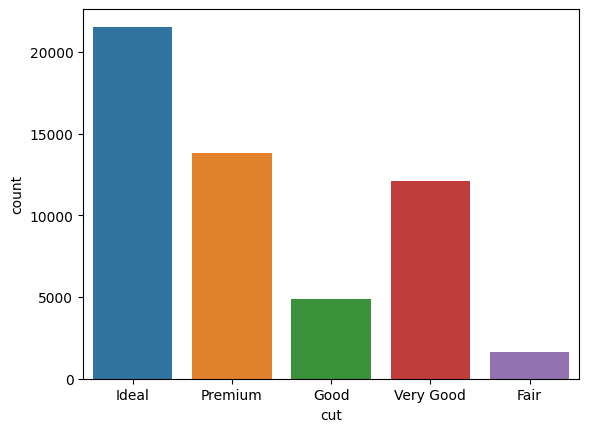

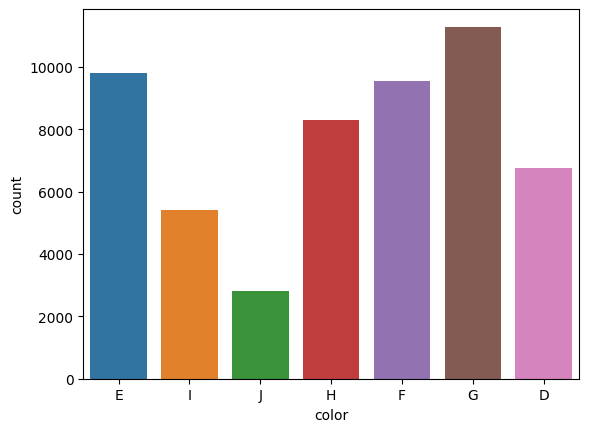

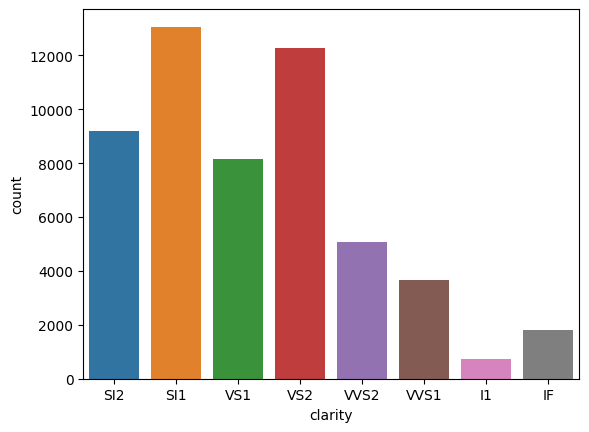

In [26]:
for i in d_cat:
    sns.countplot(x=i, data=d_cat)
    plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
le

LabelEncoder()

In [29]:
diamond['cut'] = le.fit_transform(diamond['cut'])
diamond['cut'].value_counts()

2    21551
3    13791
4    12082
1     4906
0     1610
Name: cut, dtype: int64

In [30]:
diamond['color'] = le.fit_transform(diamond['color'])
diamond['color'].value_counts()

3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: color, dtype: int64

In [31]:
diamond['clarity'] = le.fit_transform(diamond['clarity'])
diamond['clarity'].value_counts()

2    13065
5    12258
3     9194
4     8171
7     5066
6     3655
1     1790
0      741
Name: clarity, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [34]:
diamond.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [35]:
m = diamond.drop('price',axis=1)
m

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [36]:
n = diamond['price']
n

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(m,n,test_size=0.2,random_state=1)


In [38]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
42836,0.41,2,2,6,62.3,53.0,4.80,4.77,2.98
9727,1.12,3,2,3,60.5,59.0,6.79,6.73,4.09
35974,0.42,2,2,4,60.6,56.0,4.83,4.87,2.94
22501,1.04,3,1,6,62.5,59.0,6.46,6.41,4.02
3571,0.70,1,1,4,58.4,60.0,5.84,5.87,3.42
...,...,...,...,...,...,...,...,...,...
50057,0.70,4,5,5,62.8,59.0,5.56,5.61,3.51
32511,0.40,1,1,3,63.9,57.0,4.71,4.65,2.99
5192,0.91,4,3,5,62.7,63.0,6.05,6.00,3.78
12172,1.18,2,6,4,61.7,56.0,6.79,6.82,4.20


In [39]:
y_train

42836     1356
9727      4654
35974      921
22501    10539
3571      3419
         ...  
50057     2202
32511      798
5192      3776
12172     5182
33003      813
Name: price, Length: 43152, dtype: int64

In [40]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
2714,0.33,2,4,2,61.7,55.0,4.43,4.46,2.74
14653,1.20,2,5,5,62.1,57.0,6.78,6.71,4.19
52760,0.62,2,0,4,61.0,57.0,5.51,5.54,3.37
48658,0.34,1,4,5,63.1,56.0,4.41,4.46,2.80
14812,1.20,2,1,3,62.5,55.0,6.77,6.84,4.25
...,...,...,...,...,...,...,...,...,...
49568,0.67,1,3,5,57.5,60.1,5.78,5.83,3.34
32163,0.28,2,2,1,62.6,53.0,4.18,4.19,2.62
52459,0.70,0,2,5,66.4,53.0,5.51,5.49,3.65
15265,1.20,3,4,2,61.0,58.0,6.92,6.84,4.20


In [41]:
y_test

2714      564
14653    5914
52760    2562
48658     537
14812    5964
         ... 
49568    2131
32163     787
52459    2516
15265    6129
43028    1372
Name: price, Length: 10788, dtype: int64

In [42]:
model = LinearRegression()

In [43]:
model

LinearRegression()

In [44]:
model.fit(x_train, y_train)

LinearRegression()

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
# Testing data evaluation
y_pred = model.predict(x_test)
y_pred

array([-430.63009225, 6794.31096007, 3101.91593635, ..., 3130.78827137,
       6197.54695833, 1196.92000185])

In [47]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ',mse)
rmse = np.sqrt(mse)
print('rmse ', rmse)
mae = mean_absolute_error(y_test, y_pred)
print('mae :',mae)
r2_value = r2_score(y_test, y_pred)
print('r2_values :',r2_value)

Mean Squared Error:  1750176.3929057724
rmse  1322.94232410403
mae : 858.5941669276834
r2_values : 0.887365251453077


In [48]:
y_pred_train = model.predict(x_train)
y_pred_train

array([1803.99242666, 6274.26379974, 1290.30316976, ..., 4476.60654259,
       6170.23002338, 1453.84563781])

In [49]:
mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error: ',mse)
rmse = np.sqrt(mse)
print('rmse ', rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print('mae :',mae)
r2_value = r2_score(y_train, y_pred_train)
print('r2_values :',r2_value)

Mean Squared Error:  1849193.8618439205
rmse  1359.8506763038067
mae : 864.1743388602638
r2_values : 0.8844942292975203


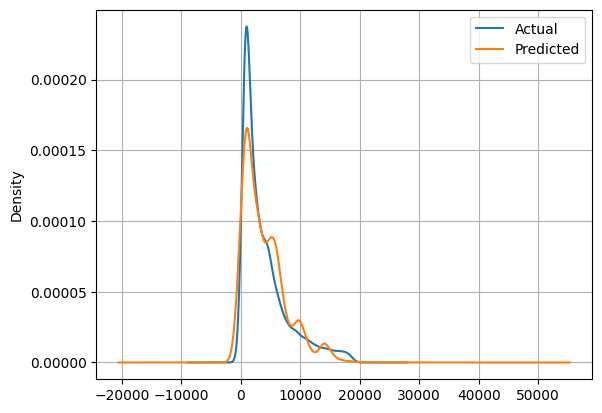

In [50]:
# compare original and predicted values
df1 = pd.DataFrame({'Actual':y_test.ravel(), 'Predicted':y_pred.ravel()})
df1.plot(kind='kde')
plt.grid()

In [51]:
x_test.head(1)

,carat,cut,color,clarity,depth,table,x,y,z
2714,0.33,2,4,2,61.7,55.0,4.43,4.46,2.74


In [52]:
model.predict([[0.4,4,1,2,60.5, 40.5, 2.5, 4.5, 2.5]])

array([4962.7012137])

In [53]:
model.predict(x_test.head(1))

array([-430.63009225])

In [54]:
model.predict([[0.33, 2, 4, 2, 61.7, 55.0, 4.43, 4.46, 2.774]])[0]

-430.07636569528404

In [55]:
x_test.tail(1)

,carat,cut,color,clarity,depth,table,x,y,z
43028,0.63,2,5,2,62.0,57.0,5.47,5.49,3.4


In [56]:
model.predict(x_test.tail(1))

array([1196.92000185])

In [57]:
model.predict([[0.63, 2, 5, 2, 62.0, 57.0, 5.47, 5.49, 3.4]])

array([1196.92000185])

In [58]:
diamond.tail(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
53939,0.75,2,0,3,62.2,55.0,2757,5.83,5.87,3.64


In [59]:
model.predict([[0.75,2,0,3,62.2,55.0,5.83,5.87,3.64]])

array([3882.99667187])

In [60]:
carat = 0.75
cut = 2
color = 0
clarity = 3
depth = 62.2
table = 55.0
x = 6.25
y = 4.12
z = 3.44
# price = ?

In [61]:
test_value = np.array([carat,cut,color,clarity,depth,table,x,y,z],ndmin=2)

In [62]:
model.predict(test_value)

array([3353.20406058])

In [1]:
dict_value = {'cut':{"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4},
              'color':{"D":0,"E":1,"F":2,"G":3,"H":4,"I":5,"J":6},
              'clarity':{'FL':0,'IF':1,'VVS1':2,'VVS2':3,'VS1':4,"VS2":5,'SI1':6,'SI2':7},
              'columns':['carat','cut','color','clarity','depth','table','x','y','z']}
dict_value

{'cut': {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4},
 'color': {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6},
 'clarity': {'FL': 0,
  'IF': 1,
  'VVS1': 2,
  'VVS2': 3,
  'VS1': 4,
  'VS2': 5,
  'SI1': 6,
  'SI2': 7},
 'columns': ['carat',
  'cut',
  'color',
  'clarity',
  'depth',
  'table',
  'x',
  'y',
  'z']}

In [6]:
dict_value['cut']['Fair']

0

In [66]:
import pickle
import json
with open('Linear_model.pkl','wb') as f:
    pickle.dump(model,f)

In [67]:
with open('diamond_price_pridiction.json','w') as f:
    json.dump(dict_value,f)